## Housing Prices Index Analysis

### Hypothesis: 
Housing markets across the nation should follow each other. Obviously there will be some divergence from the average in certain locations, but let's investigate if markets return to the index mean. They should be at least correlated in some degree, but we need to test that assumption to be sure.

### Data: 
To steam line things, I'm attempting to utilize Quandl's API for the housing data. What we want to do is find all 50 state's data. To do this we can scrape a Wikipedia list for state names and then populate a dataframe with data queried directly from Quandl. First let's import some necessary modules:

In [13]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use("fivethirtyeight")

Utilizing the API key, we can gather data for Oregon: 

In [4]:
api_key = "UjMPYtm8xWdYKXHD8Fok"
df = pd.DataFrame()
df = quandl.get('FMAC/HPI_OR', authtoken=api_key)

Importantly, if we are trying to understand the analysis of housing markets across the nation, we need data on all 50 states. This shouldn't be that hard. What we can do is gather a simple list of state abbreviations from Wikipedia, so we can run that list through Quandl.

In [5]:
states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")

Now that we have the list, let's populate a dataframe from this list. Since Quandl changed their series titles to _'Value'_ we have to alter the column names as well. 

In [6]:
main_df = pd.DataFrame()

for abrev in states[0][0][1:]:
    query = "FMAC/HPI_" + str(abrev)
    df = quandl.get(query, authtoken=api_key)
    df.columns = [abrev]
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)

In [7]:
main_df2 = pd.DataFrame()

for abrev in states[0][0][1:]:
    query = "FMAC/HPI_" + str(abrev)
    df = quandl.get(query, authtoken=api_key)
    df = df.rename(columns={'Value': abrev})     
    df[abrev] = ((df[abrev] - df[abrev][0]) / df[abrev][0]) * 100.00

    if main_df2.empty:
        main_df2 = df
    else:
        main_df2 = main_df2.join(df)

For ease of replication, we can export the result as Panda Pickle. This allows us to call in the object without having to query Quandl every time. 

In [8]:
#For original dataset
pickle_out = open("states_housing_index.pickle", "wb")
pickle.dump(main_df, pickle_out)
pickle_out.close()

#For percent change dataset
pickle_out = open("percent_change_HPI.pickle", "wb")
pickle.dump(main_df2, pickle_out)
pickle_out.close()

Importing data from the Pickle object:

In [9]:
#Import original dataset
pickle_in = open("states_housing_index.pickle", "rb")
HPI_data = pickle.load(pickle_in)

#Import percent change dataset
pickle_in = open("percent_change_HPI.pickle", "rb")
HPI_percent_data = pickle.load(pickle_in)

Also, to understand the `National Average`, we're going to need a series on that as well. Fortunately, we can import Freddie Mac's United States series. Apposed to a period over period percentage change, I'm going to utilize a percent charge from the initial value. This should give us a better understanding of home price inflation since 1975 (creation of the series). Again we can just query Quandl for that:

In [10]:
    HPI_bench = pd.DataFrame()
    HPI_bench = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    HPI_bench.columns = ['United States']
    HPI_bench["United States"] = ((HPI_bench["United States"]-HPI_bench["United States"][0]) / HPI_bench["United States"][0]) * 100.0

### Analysis

Now that we have gathered and populated our dataframe, we are good to run analysis! Again, our overall aim is to see if certain state's housing markets diverge from the nation mean. Let's first run some high level manipulations:

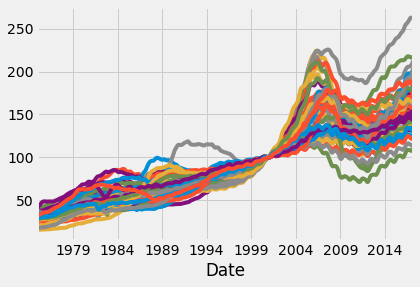

In [23]:
HPI_data.plot()
plt.legend().remove()
plt.show()

Notice how all of the housing prices converge upon the 2000 or 100 mark. This is due to structural erros in the plot/data. To correct for this, we can transform the data to represent percent change rather than real values.

##### Percent Change:

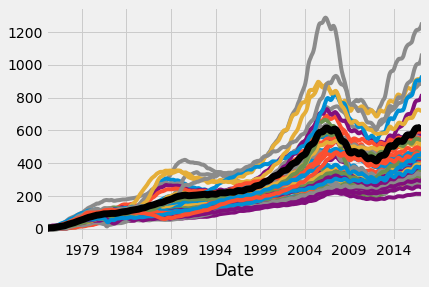

In [27]:
plt.clf()

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_percent_data.plot(ax=ax1)
HPI_bench.plot(color='k', ax=ax1, linewidth=7)

plt.legend().remove()
plt.show()

Looking at this data, it's pretty clear that the national average index follows the overall trend. There is mean variance across certain markets (notice the outliers above and below). This deviation from the mean appears to increase with respect to time as well. In 1975, the overall variance appears to be 200%, but present variance appears to be around 800%. This growth seems to have stayed constant since 2000s onward. 

##### Correlation:

It also could be incredibly useful to determine correlation between markets. Fortunately, Pandas has a function we can call on our dataframe to determine correlation. What this does for us is look at the historical prices for each state and determine the correlation between each and every other state's movement. From an investment perspective, we could view when two highly correlated markets start to diverge, purchase the rising market, short the falling market, under the perception that the two markets will eventually converge back.

In [ ]:
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation)
HPI_State_Correlation.describe()
HPI_State_Correlation.min()

This is pretty interesting. Most markets are pretty highly correlated (value close to 1). The lowest correlation is around the .75 mark, which is still relatively positive. This tells us, as a whole, the state markets tend to follow each other in a general trend. Whether they follow each other up or down would be a great question to ask as well. With this, we can now  look at opportunities where markets diverge from the national mean, but even based on movements from other states. We could invest in markets where the price falls by a standard deviation or sell when the price rises by a standard deviation as well. 

#### Transform the Data: 


Just for practice, I'm going to work on transform the data. This is fairly easy using pandas because of built in functions. We can re-sample by years, quarters, months, weeks, days, and even seconds (looking at you finance people). This can be a helpful practice to seasonally adjust series if need be. 

In [19]:
HPI_data_SA1yr = HPI_data['OR'].resample('A').mean()

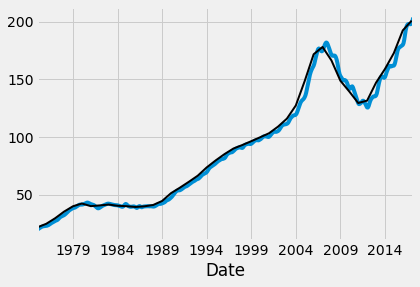

In [26]:
HPI_data['OR'].plot()
HPI_data_SA1yr.plot(color="k", linewidth=2)

plt.show()